<a href="https://colab.research.google.com/github/GabyPaolaING/Machine-Learning/blob/main/Regresi%C3%B3n_polinomial_en_el_aprendizaje_autom%C3%A1tico_comprensi%C3%B3n_del_proceso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión polinomial en el aprendizaje automático: comprensión del proceso

## 2.1 Fundamentos de la técnica

La regresión polinómica es un tipo de regresión lineal donde la relación entre la variable de entrada (x) y la variable de salida (y) se expresa como un polinomio. En términos más simples, es como ajustar una línea curva en lugar de una línea recta a los puntos de datos. Esta curva representa cómo cambia y al elevar x a diferentes potencias, como x, x², x³, etc. Este enfoque es especialmente útil cuando los datos muestran un patrón que no es una línea recta, lo que indica que la relación entre x e y es más compleja que simplemente aumentar o disminuir a una tasa constante.

## 2.2 Modelo Matemático de la técnica

La regresión polinómica es una técnica estadística que modela la relación entre una variable dependiente y y una variable independiente x como un polinomio de grado n. Es una extensión de la regresión lineal, que se utiliza cuando los datos muestran una relación no lineal. El modelo adopta la forma:



In [1]:
from IPython.display import display, Math

display(Math(r"y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \dots + \beta_n x^n + \varepsilon"))
display(Math(r"\text{donde:}"))
display(Math(r"y: \text{ variable dependiente (resultado)}"))
display(Math(r"x: \text{ variable independiente}"))
display(Math(r"\beta_0, \beta_1, \dots, \beta_n: \text{ coeficientes del modelo}"))
display(Math(r"\varepsilon: \text{ término de error}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## 2.3 Descripción de la librería, clases, funciones y sus parámetros

El artículo emplea las siguientes librerías principales:

pandas: para manipulación del dataset.

numpy: para cálculos numéricos.

matplotlib.pyplot y seaborn: para visualizar los datos.

sklearn.preprocessing.PolynomialFeatures: genera características polinomiales a partir de la variable independiente.

Parámetro: degree (grado del polinomio).

sklearn.linear_model.LinearRegression: ajusta el modelo de regresión a los datos transformados.

sklearn.model_selection.train_test_split: divide el dataset en conjuntos de entrenamiento y prueba.

## 2.4 Pipeline

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorar advertencias
warnings.filterwarnings('ignore')


In [2]:
# Generación de los datos
X = np.arange(0, 40)
y = [1, 4, 5, 7, 8, 6, 9, 10, 10, 23, 25, 44, 50, 63, 67, 64, 62, 70, 75, 88,
     90, 92, 95, 100, 108, 135, 151, 160, 169, 172, 173, 176, 175, 175, 176,
     178, 179, 180, 190, 201]

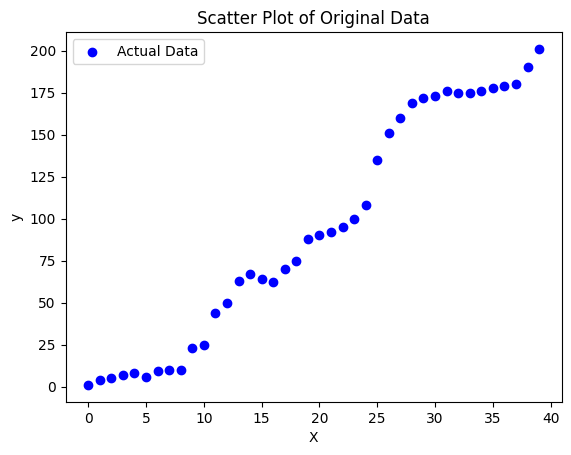

In [3]:
# Gráfico de dispersión de los datos originales
plt.scatter(X, y, color='blue', label='Actual Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of Original Data')
plt.legend()
plt.show()

## Feature Engineering

In [4]:
# En este caso, X y y son los conjuntos de variables ya definidos.
# Se transformarán más adelante con características polinomiales.

## Model Selection

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Configuración del pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

In [8]:
# Búsqueda del mejor grado polinomial
parameters = {'poly__degree': np.arange(1, 5)}
grid_search = GridSearchCV(pipeline, parameters, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1, 1), y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('linear', LinearRegression())]),
             param_grid={'poly__degree': array([1, 2, 3, 4])},
             scoring='neg_mean_squared_error')

In [9]:
best_degree = grid_search.best_params_['poly__degree']
print(f"Mejor grado polinomial: {best_degree}")

Mejor grado polinomial: 3


## Model Training

In [10]:
poly_best = PolynomialFeatures(degree=best_degree)
X_poly_train_best = poly_best.fit_transform(X_train.reshape(-1, 1))
X_poly_test_best = poly_best.transform(X_test.reshape(-1, 1))

In [11]:
model_best = LinearRegression()
model_best.fit(X_poly_train_best, y_train)

LinearRegression()

## Prediction

In [12]:
# Predicciones
pred_train = model_best.predict(X_poly_train_best)
pred_test = model_best.predict(X_poly_test_best)

In [13]:
# Evaluaciones
train_error = mean_squared_error(y_train, pred_train)
test_error = mean_squared_error(y_test, pred_test)
train_r2 = r2_score(y_train, pred_train)
test_r2 = r2_score(y_test, pred_test)

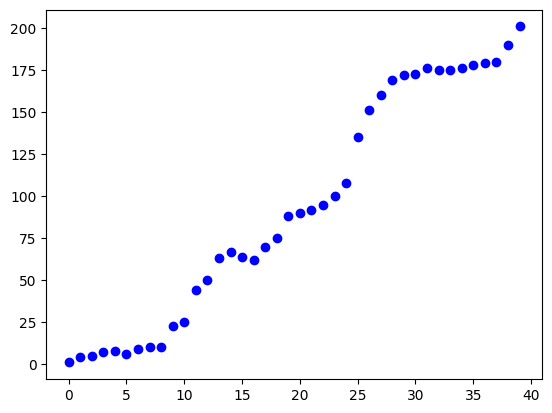

In [17]:
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')

## Model Evaluation

In [20]:
# Evaluación del modelo
train_error = mean_squared_error(y_train, predictions_train)
test_error = mean_squared_error(y_test, predictions_test)
train_accuracy = r2_score(y_train, predictions_train)
test_accuracy = r2_score(y_test, predictions_test)

print("Grado polinomial óptimo:", best_degree)
print("Error cuadrático medio (Train):", train_error)
print("Error cuadrático medio (Test):", test_error)
print("R² (Train):", train_accuracy)
print("R² (Test):", test_accuracy)


Grado polinomial óptimo: 3
Error cuadrático medio (Train): 82.12057919191898
Error cuadrático medio (Test): 93.19555930834686
R² (Train): 0.9833308707514882
R² (Test): 0.9716276725394738


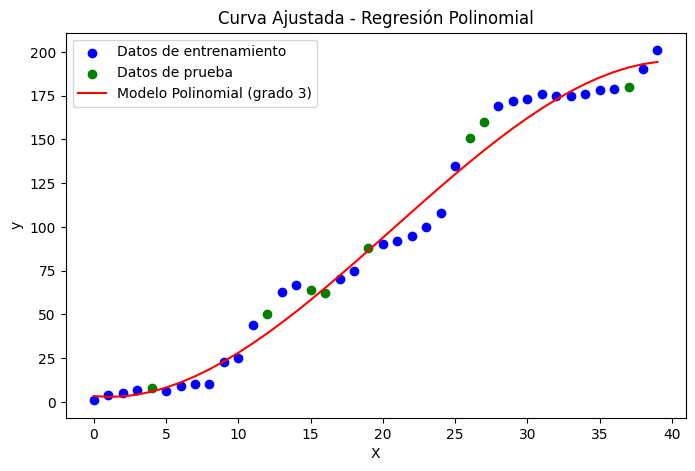

In [19]:
# Realizar predicciones con el mejor modelo
predictions_train = model_best.predict(X_poly_train_best)
predictions_test = model_best.predict(X_poly_test_best)

# Visualización de los resultados
plt.figure(figsize=(8,5))

# Datos reales (azules)
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')

# Datos de prueba (verdes)
plt.scatter(X_test, y_test, color='green', label='Datos de prueba')

# Curva ajustada (roja)
plt.plot(
    np.sort(X),
    model_best.predict(poly_best.fit_transform(np.sort(X).reshape(-1,1))),
    color='red',
    label=f'Modelo Polinomial (grado {best_degree})'
)

plt.title('Curva Ajustada - Regresión Polinomial')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


## Conclusion

La regresión polinómica es una herramienta versátil con aplicaciones en diversos dominios. Al abordar relaciones no lineales, requiere una cuidadosa consideración del sobreajuste y la complejidad del modelo.